# Exercise 8
***

## 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [98]:
def func(x):
        return (4-2.1*x[0]**2 + x[0] ** 4 / 3 )* x[0] ** 2 + x[0] * x[1] + (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)

x2 = np.array([x, y])

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_14568/537386096.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


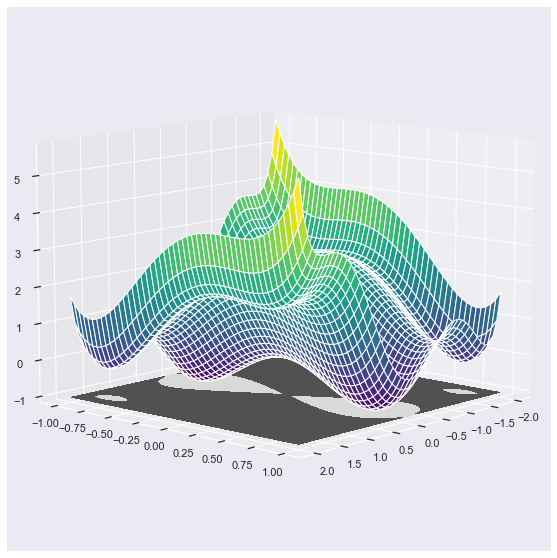

In [101]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

x1, y1 = np.meshgrid(x, y)
z = func(np.array([x1, y1]))

fig = plt.figure(figsize=(10, 10))
color = plt.get_cmap('viridis')
ax = fig.gca(projection='3d')
grid = ax.plot_surface(x1, y1, z, cmap=color)
ax.view_init(10, 42)
cset = ax.contourf(x1, y1, z, zdir='z', offset=np.min(z),levels=0, cmap=plt.get_cmap('Greys'))
plt.show()


In [39]:
sol = sp.optimize.minimize(func, x0 =[np.random.uniform(-2, 2, 100), np.random.uniform(-1, 1, 100)])
print(len(sol.x))

200


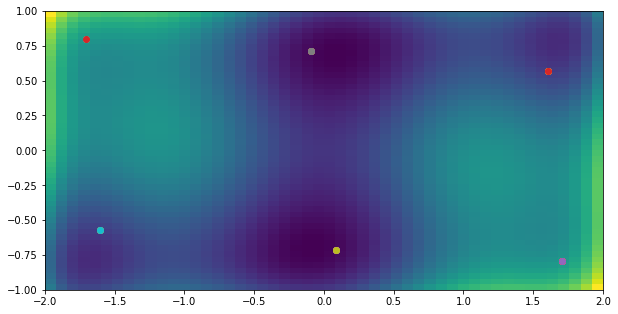

In [40]:
val = np.array
plt.figure(figsize=(10, 10))
plt.imshow(func([x1, y1]), extent=[-2, 2, -1, 1])
for i in range(1000):
    x = np.random.uniform(-2, 2)
    y = np.random.uniform(-1, 1)
    sol = sp.optimize.minimize(func, x0 =[x, y])
    plt.scatter(sol.x[0], sol.x[1])
    val = np.append(val, sol.fun)
plt.show()

From the plot above we can see that the function has 6 minima in the given range of x and y. 
The value of the function is in the list val. The function seems to be symmetric because the the values of the minima is the same 
2 points.

In [41]:
val = [ "{:0.2f}".format(x) for x in val[1:]]

In [42]:
val = np.unique(val)
val

array(['-0.22', '-1.03', '2.10'], dtype='<U5')

In [43]:
sol = sp.optimize.minimize(func, x0 =[0, 0])
sol.x

array([0., 0.])

At the (0,0) the function also have the value 0.

For the initial values (0,0) we stay at the point 0. Probably beacuse it is a saddle point.

## 2.

/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([  -1.39717244,    6.16452595, -184.38792774,  -61.32093734])

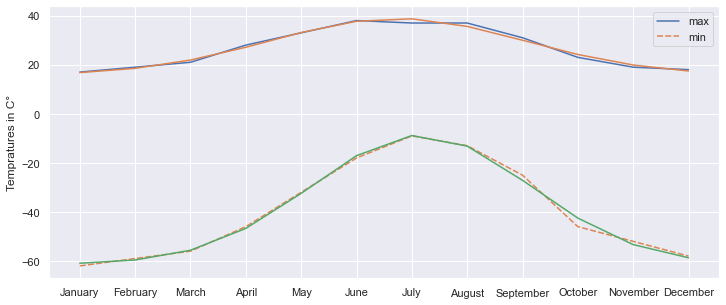

In [106]:
max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

temp = pd.DataFrame(index=pd.date_range('2018-01-01','2018-12-31',freq='M').month_name())
temp['max'] = max
temp['min'] = min

alist = np.arange(0, 12)

def func1(x, std1, m1, s1, n1):
    return s1/(np.sqrt(2 * np.pi) * std1) * np.exp(-(x - m1)**2/(2*std1)**2) + n1

def func2 (x, std2, m2, s2, n2):
    return s2/(np.sqrt(2 * np.pi) * std2) * np.exp(-(x - m2)**2/(2*std2)**2) + n2

# gaussian with some parameters to fit the temperatures

para_max = sp.optimize.curve_fit(func1, alist ,temp['max'])
para_min = sp.optimize.curve_fit(func2, alist ,temp['min'])

fig = plt.subplots(figsize=(12, 5))
sns.lineplot(data=temp)
sns.lineplot(alist, func1(alist, para_max[0][0], para_max[0][1], para_max[0][2], para_max[0][3]))
sns.lineplot(alist, func2(alist, para_min[0][0], para_min[0][1], para_min[0][2], para_min[0][3]))
plt.ylabel('Tempratures in C°')




para_min[0]

Fit looks really good.

## 3.

In [7]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /Users/max/data/

--2021-12-16 00:16:23--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-12-16 00:16:24--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd37c85279912302e388013fafb.dl.dropboxusercontent.com/cd/0/inline/Bb50HYFdV2_ytqwkLMT5Rff5Pndwd5joKJZUULpIb2qN9_XVVzPMe5sF5NXs9kXmnl4Wfw-otaQpgjKN952nUyHzubqkHsWoOiXQnw7RUvgrsJCMZIjHCqYWkc6oNudlWfDX7yzVu5i1Z3RCcVHyTUrM/file# [following]
--2021-12-16 00:16:24--  https://ucd37c85279912302e388013fafb.dl.dropboxusercontent.com/cd/0/inline/Bb50HYFdV2_ytqwkLMT5Rff5Pndwd5joKJZUULpIb2qN9_XVVzPMe5sF5NXs9kXmnl4Wfw-otaQpgjKN952nUyHzubqkHsWoOiXQnw7RUvgrsJCMZIjHCqYWkc6oNudlWfDX7yzVu

In [2]:
data = pd.DataFrame(pd.read_pickle("/Users/max/data/residuals_261.pkl").item())

<AxesSubplot:xlabel='residuals', ylabel='Count'>

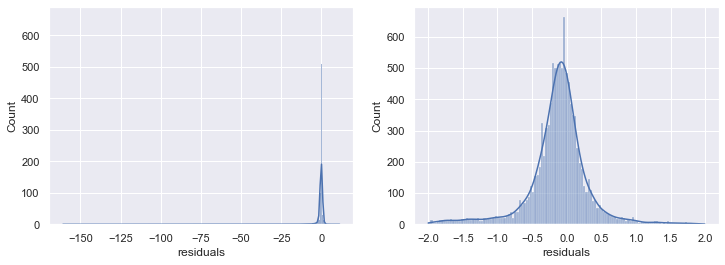

In [3]:
thresh = 2
mask = ((-thresh < data['residuals']) & (data['residuals'] < thresh))

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(data['residuals'], kde=True, ax=ax[0])
sns.histplot(data['residuals'][mask], kde=True, ax=ax[1])


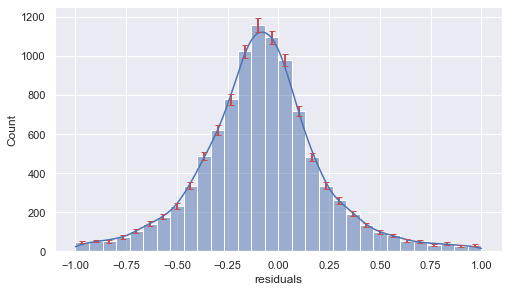

In [59]:
# take range from -1 to 1
bins = 30
thresh = 1

mask = ((-thresh < data['residuals']) & (data['residuals'] < thresh))

fig = plt.figure()
x = plt.hist(data['residuals'][mask], bins=bins)
plt.close()

fig = plt.figure(figsize=(8,4.5))
sns.histplot(data['residuals'][mask], bins=bins, kde=True)
plt.errorbar(x=x[1][:-1]-(x[1][1]-x[1][2])/2 ,y=x[0] ,yerr=np.sqrt(abs(x[0])), fmt='None', ecolor='r', elinewidth=2, capsize=3)
plt.show()


In [120]:
def func(x, a, b, c, d):
    return (a/(np.sqrt(2 * np.pi) * b) * np.exp(-(x - c)**2/(2 * b) **2)) + d


def func1(x, std1, m1, s1, n1):
    return s1/(np.sqrt(2 * np.pi) * std1) * np.exp(-(x - m1)**2/(2*std1)**2) + n1

In [146]:
a, b = sp.optimize.curve_fit(func, x[1][:-1] + (abs(x[1][0] - x[1][1]))/2 ,x[0], p0=[2, 0.3, 0.1, 36])
print(a)

[ 3.72017403e+02  1.42958043e-01 -8.59187196e-02  6.70447154e+01]


/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


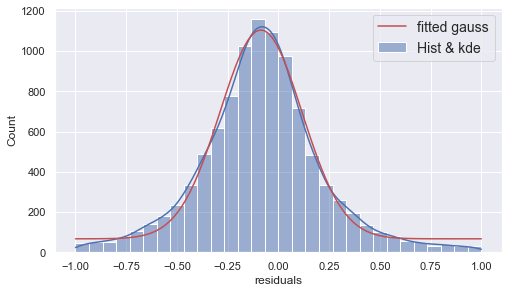

In [147]:
s = np.linspace(-1, 1, 100)

fig = plt.figure(figsize=(8, 4.5))
sns.histplot(data['residuals'][mask], bins=bins, kde=True, label='Hist & kde')
sns.lineplot(s, func(s, a[0], a[1], a[2], a[3]), color='r', label='fitted gauss')
#sns.lineplot(x[1][:-1] + (abs(x[1][0] - x[1][1]))/2, func(x[1][:-1] + (abs(x[1][0] - x[1][1]))/2, a[0], a[1], a[2]), color='r', label='fitted gauss')
plt.legend(fontsize=14)
plt.show()

In [148]:
ndof = 3
chi2 = np.sum((func(x[1][:-1] + (abs(x[1][0] - x[1][1]))/2, a[0], a[1], a[2], a[3])- x[0])**2/np.sqrt(abs(x[0])))
pvalue =1. - sp.stats.chi2.cdf(chi2, ndof)

In [151]:
y_ = (func(x[1][:-1] + (abs(x[1][0] - x[1][1]))/2, a[0], a[1], a[2], a[3]))
y = (x[0])

chi = 0
for y, y_ in zip(y, y_):
    chi+= (y-y_)**2/np.sqrt(y)
    
print(chi)
print(chi2)

2628.4111127951487
2628.411112795148


In [150]:
print('p-value: {:.4f}'.format(pvalue))

p-value: 1.0000


Seems like the fit isn't very good from the p-value point of view but in reality the fit looks good.

## 4.

In [152]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /Users/max/data/

--2021-12-15 15:29:56--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2021-12-15 15:29:56--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc209950f95f1c4229d01399d0cb.dl.dropboxusercontent.com/cd/0/inline/Bb4Sv7U_RGlqObGuJqoMppjVRsBcVoMiqq0LswX8bEFkIXBfHYcXQyHD3AuWuTqD4GYwgv-M2mKbVQx_fn-DsWOfhirZTzT0ql6Z53Fq2gCigzKmv7vqUkopm2gHR4DpnOucFQAuoRGE4vsZtxdaU6k2/file# [following]
--2021-12-15 15:29:57--  https://uc209950f95f1c4229d01399d0cb.dl.dropboxusercontent.com/cd/0/inline/Bb4Sv7U_RGlqObGuJqoMppjVRsBcVoMiqq0LswX8bEFkIXBfHYcXQ

In [299]:
data = np.loadtxt('/Users/max/data/munich_temperatures_average_with_bad_data.txt')

In [300]:
data = pd.DataFrame(data, columns=['year', 'temp'])
x = np.array(data['year'])

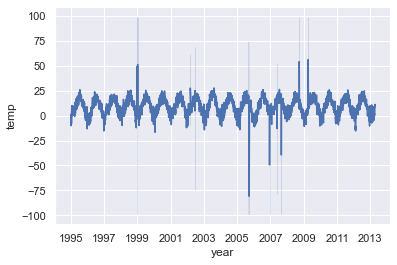

In [301]:
sns.lineplot(x=data['year'], y=data['temp'])
plt.xticks(np.arange(1995, 2014, 2))
plt.show()

In [302]:
def func(t,a,b,c):
    return a * np.cos(2 * np.pi * t + b) + c

mask = ((2008 <= data['year']) & (data['year'] < 2013))
params, z = sp.optimize.curve_fit(func, data['year'][mask], data['temp'][mask])

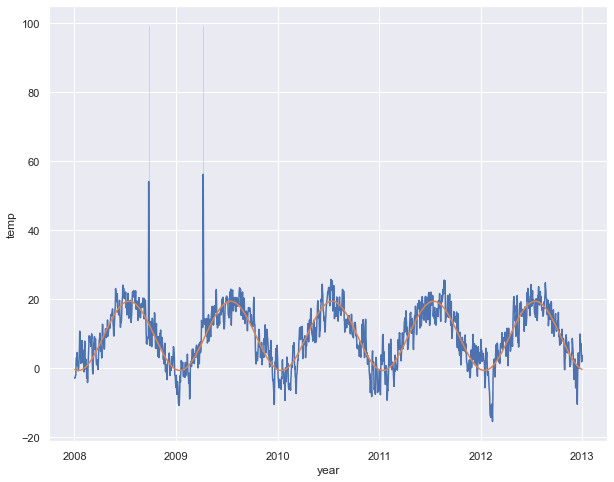

In [303]:
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x=data['year'][mask], y=data['temp'][mask])
sns.lineplot(x=data['year'][mask], y=func(data['year'][mask], params[0], params[1], params[2]))
plt.xticks(np.arange(2008, 2014, 1))
plt.show()

In [304]:
print('Average Temp in munich from 2008 - 2012: {:.2f} C°'.format(data['temp'][mask].mean()))

Average Temp in munich from 2008 - 2012: 9.35 C°


In [305]:
max_value = func(data['year'][mask], params[0], params[1], params[2]).max()
min_value = func(data['year'][mask], params[0], params[1], params[2]).min()

print('Typical average Tempratures for hottest time {:.2f} C°'.format(max_value))
print('Typical average Tempratures for hottest time {:.2f} C°'.format(min_value))



Typical average Tempratures for hottest time 19.37 C°
Typical average Tempratures for hottest time -0.67 C°


$b$ is the phase change of the $\cos$ function and with the change of $b$ the seasons of the year are changing

In [306]:
def func2(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t *b + c) + d

mask = ((2008 <= data['year']) & (data['year'] < 2013))
params2, z = sp.optimize.curve_fit(func2, data['year'][mask], data['temp'][mask])

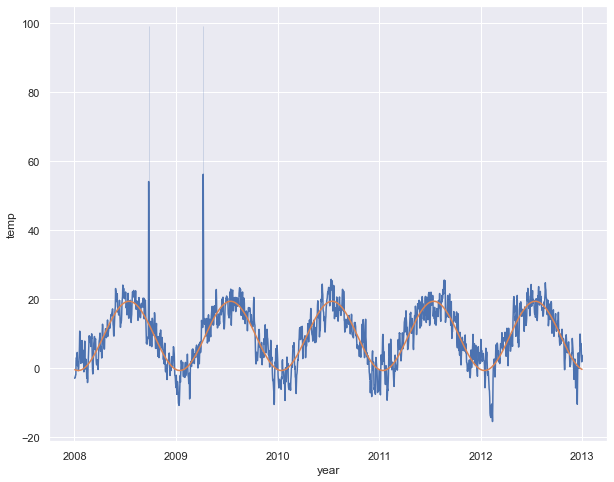

In [307]:
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x=data['year'][mask], y=data['temp'][mask])
sns.lineplot(x=data['year'][mask], y=func2(data['year'][mask], params2[0], params2[1], params2[2], params2[3]))
plt.xticks(np.arange(2008, 2014, 1))
plt.show()

In [308]:
rss_f = np.sum((data['temp'][mask]-func(data['year'][mask], params[0], params[1], params[2]))**2)
rss_g = np.sum((data['temp'][mask]-func2(data['year'][mask], params2[0], params2[1], params2[2], params2[3]))**2)

In [309]:
print('RSS of f(x) = ',rss_f)
print('RSS of g(x) = ',rss_g)

RSS of f(x) =  40376.572228258934
RSS of g(x) =  40375.27997690762


In [310]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=True):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - sp.stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

Ftest(rss_f, rss_g, 2, 3, len(data['temp'][mask]))

CL: 0.809 , additional parameter necessary: NO


0.8091551661267262

So the additional parameters is not necessary.